In [4]:
import json

In [5]:
with open("raw jsons/P393411_0.json", encoding="utf-8") as fin:
    j= json.loads(fin.read())

In [6]:
type(j)

dict

In [7]:
j.keys()

dict_keys(['Includes', 'Locale', 'Errors', 'Results', 'TotalResults', 'Limit', 'HasErrors', 'Offset'])

In [8]:
j["HasErrors"], j["Errors"]

(False, [])

In [9]:
totres = j["TotalResults"]

In [10]:
type(totres)

int

In [11]:
totres

645

In [12]:
results = j["Results"]

In [13]:
type(results)

list

In [14]:
len(results)

100

In [15]:
r0 = results[0]

In [16]:
type(r0)

dict

In [17]:
r0.keys()

dict_keys(['UserNickname', 'Rating', 'ReviewText', 'ContextDataValues', 'ProductId', 'Videos', 'Photos', 'CommentIds', 'TotalNegativeFeedbackCount', 'RatingRange', 'CampaignId', 'UserLocation', 'SecondaryRatingsOrder', 'TotalCommentCount', 'ContextDataValuesOrder', 'ClientResponses', 'TagDimensionsOrder', 'TotalPositiveFeedbackCount', 'IsRatingsOnly', 'LastModificationTime', 'Pros', 'ProductRecommendationIds', 'BadgesOrder', 'AuthorId', 'Helpfulness', 'SubmissionTime', 'AdditionalFields', 'AdditionalFieldsOrder', 'TotalFeedbackCount', 'Title', 'ModerationStatus', 'IsFeatured', 'Cons', 'TagDimensions', 'SecondaryRatings', 'Badges', 'SubmissionId', 'IsSyndicated', 'IsRecommended', 'LastModeratedTime', 'Id', 'ContentLocale'])

In [18]:
r0["ContextDataValues"]["skinTone"]

{'Value': 'fair',
 'Id': 'skinTone',
 'ValueLabel': 'Fair',
 'DimensionLabel': 'Skin Tone'}

In [19]:
import pandas as pd

In [108]:
def formulate_data(r):
    data = {
        "UserNickname": r["UserNickname"],
        "Rating":       r["Rating"],
        "ReviewText":   r["ReviewText"],
        "ProductId":    r["ProductId"],
        "RatingRange":  r["RatingRange"],
        "LastModificationTime": r["LastModificationTime"],
        "AuthorId":     r["AuthorId"],
        "Helpfulness":  r["Helpfulness"],
        "Id":           r["Id"],
    }

    if "ContextDataValues" in r:
        ctx = r["ContextDataValues"]
        d2 = {
            "skinType":     ctx["skinType"]["Value"] if "skinType" in ctx else None,
            "eyeColor":     ctx["eyeColor"]["Value"] if "eyeColor" in ctx else None,
            "hairColor":    ctx["hairColor"]["Value"] if "hairColor" in ctx else None,
            "skinTone":     ctx["skinTone"]["Value"] if "skinTone" in ctx else None,
            "age":          ctx["age"]["Value"] if "age" in ctx else None,
        }
        data.update(d2)
    return data

In [109]:
columns = "UserNickname, Rating, ReviewText, skinType, eyeColor, hairColor, skinTone, age, ProductId, RatingRange, LastModificationTime, AuthorId, Helpfulness, Id".split(", ")

In [110]:
import time
import os

In [111]:
all_data = []
t0 = time.time()
for root, dirs, files in os.walk("./raw jsons/"):
    for i, file in enumerate(files):
        if file.endswith(".json"):
            with open(os.path.join("raw jsons", file), encoding="utf-8") as fin:
                j = json.load(fin)
                if "Results" in j:
                    for r in j["Results"]:
                        all_data.append(formulate_data(r))
            if (i + 1) % 100 == 0 or i + 1 == len(files):
                dt = time.time() - t0
                print("{:4d}: used = {:>6.2f}, eta = {:.2f}".format(i+1, dt, dt * (len(files) - i - 1) / (i + 1)))

print("creating df")
df = pd.DataFrame(all_data)

 100: used =   0.43, eta = 7.10
 200: used =   0.77, eta = 6.01
 300: used =   1.07, eta = 5.18
 400: used =   1.38, eta = 4.68
 500: used =   1.69, eta = 4.25
 600: used =   2.10, eta = 4.06
 700: used =   2.40, eta = 3.63
 800: used =   2.71, eta = 3.24
 900: used =   3.03, eta = 2.88
1000: used =   3.35, eta = 2.54
1100: used =   3.75, eta = 2.25
1200: used =   4.04, eta = 1.88
1300: used =   4.33, eta = 1.53
1400: used =   4.70, eta = 1.20
1500: used =   5.17, eta = 0.89
1600: used =   5.47, eta = 0.54
1700: used =   5.76, eta = 0.20
1758: used =   5.90, eta = 0.00
creating df


In [112]:
len(df)

157456

In [113]:
df.to_csv("all sephora.csv", encoding="utf-8")

In [114]:
df.columns

Index(['AuthorId', 'Helpfulness', 'Id', 'LastModificationTime', 'ProductId',
       'Rating', 'RatingRange', 'ReviewText', 'UserNickname', 'age',
       'eyeColor', 'hairColor', 'skinTone', 'skinType'],
      dtype='object')

In [119]:
print(len(set(df.ProductId)))
list(set(df.ProductId))[:10]

3576


['1905538',
 '2026615',
 '2026664',
 '2015576',
 '2121044',
 '1371830',
 '1905462',
 '2177210',
 '1911841',
 '2064897']

## Plot

In [120]:
import matplotlib.pyplot as plt

In [121]:
import collections

In [122]:
import seaborn as sns

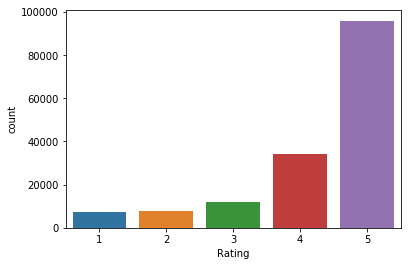

In [123]:
ax = sns.countplot(x="Rating", data=df)

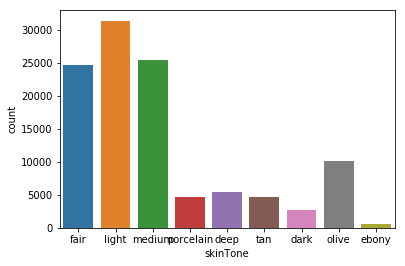

In [124]:
skinTone = sns.countplot(x="skinTone", data=df)

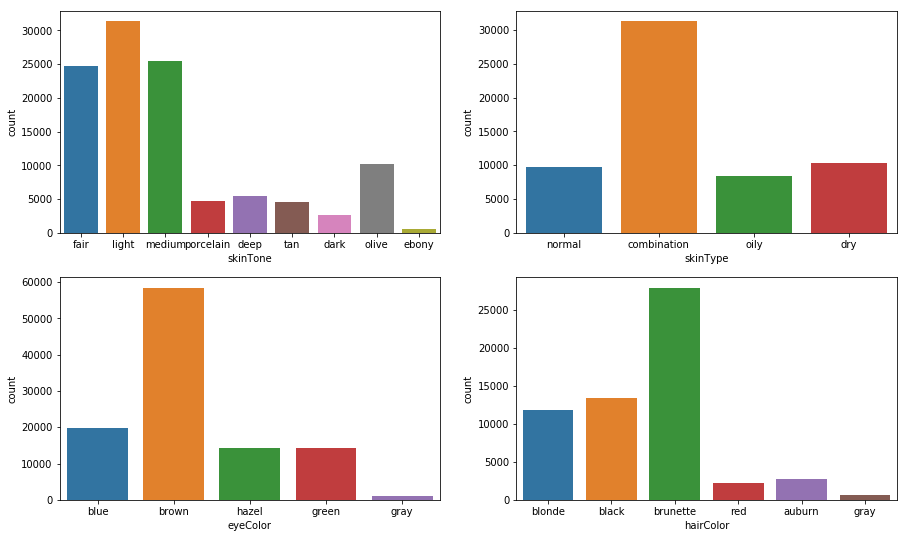

In [125]:
f, axes = plt.subplots(2, 2, figsize=(15, 9), sharex=False)
skinTone = sns.countplot(x="skinTone", data=df, ax=axes[0, 0])
skinType = sns.countplot(x="skinType", data=df, ax=axes[0, 1])
eyeColor = sns.countplot(x="eyeColor", data=df, ax=axes[1, 0])
hairColor = sns.countplot(x="hairColor", data=df, ax=axes[1, 1])

## Data Size

## Relevant Statistics

## Challenges from a Data

## Additional Data (plan)

including the expected size of the data and discussing the collection timeframe taking into account API limitations/rules

 

## Word Cloud

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
tokenizer = TreebankWordTokenizer()

In [ ]:
import re

In [ ]:
s = "\n".join(df.ReviewText)

In [ ]:
s = re.sub(r"[^A-Za-z]", " ", s)

In [ ]:
tokens = tokenizer.tokenize(s.lower())

In [ ]:
rule = re.compile(r"\w+")

In [ ]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

In [ ]:
tokens = list(filter(
    lambda x : "lip" not in x,
    filter(
        lambda x : x not in stops,
        filter(
            rule.match,
            tokens
        )
    )
))

In [ ]:
counter = collections.Counter(tokens)

In [ ]:
counter["formal"]

In [ ]:
for k, v in counter.items():
    if v > 5:
        print(v, k)

---

In [ ]:
prods = j["Includes"]["Products"]

In [ ]:
prods["1664267"]

In [ ]:
sorted(collections.Counter(df["ProductId"]).items(), key=lambda item : item[1], reverse=True)

In [ ]:
def print_sorted(skuid):
    global df
    df[df["ProductId"] == skuid]
    print("skinTone")
    print(sorted(collections.Counter(df["skinTone"]).items(), key=lambda item : item[1], reverse=True))

In [ ]:
print_sorted("1441641")

---

In [ ]:
import re, json

In [ ]:
with open("listing.txt") as fin:
    t = fin.read()
pids = set(re.findall(r"(?:grid:)(.*?)(?::)", t))
pids.add("P443336")

In [ ]:
import math

In [ ]:
count = 0
total = 0
for i, pid in enumerate(pids):
    offset = 0
    with open("raw jsons/{pid}_{offset}.json".format(pid=pid, offset=offset), encoding="utf-8") as fin:
        j = json.load(fin)
    print("{i:>4d}/{t} {pid:>12s}_{offset}: TotalResults={TotalResults:<5d} Errors={Errors}".format(
        i=i, 
        t=len(pids), 
        pid=pid, 
        offset=offset,
        TotalResults=j["TotalResults"],
        Errors=j["Errors"]))
    total += j["TotalResults"]
    count += math.ceil(j["TotalResults"]/100)

In [ ]:
count, total

---